In [95]:
import pandas as pd
import numpy as np
import scipy
import os
import os.path
from matplotlib import cm
from IPython.display import display, HTML

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import calendar

df = pd.read_csv("ava.csv")

In [96]:
df.head()

,Unnamed: 0,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br
0,0,359,2016-11-12,2016-12-06,1,25,2016-11-12,1,36.11,68.375941,16.081958
1,1,359,2016-11-12,2016-12-06,1,25,2016-11-13,2,35.70,67.499289,15.681856
2,2,359,2016-11-12,2016-12-06,1,25,2016-11-14,3,35.38,63.632920,15.381588
3,3,359,2016-11-12,2016-12-06,1,25,2016-11-15,4,35.64,66.366427,15.448914
4,4,359,2016-11-12,2016-12-06,1,25,2016-11-16,5,35.87,66.680990,15.823407


In [97]:
len(df)

20161

In [98]:
"# Unnamed: {}".format(len(df["Unnamed: 0"].unique()))

df = df.drop(["Unnamed: 0"], axis = 1)
df.head()

,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br
0,359,2016-11-12,2016-12-06,1,25,2016-11-12,1,36.11,68.375941,16.081958
1,359,2016-11-12,2016-12-06,1,25,2016-11-13,2,35.70,67.499289,15.681856
2,359,2016-11-12,2016-12-06,1,25,2016-11-14,3,35.38,63.632920,15.381588
3,359,2016-11-12,2016-12-06,1,25,2016-11-15,4,35.64,66.366427,15.448914
4,359,2016-11-12,2016-12-06,1,25,2016-11-16,5,35.87,66.680990,15.823407


In [99]:
print("# Users: {}".format(len(df["user"].unique())))
print()
print("unique user ids: {}".format(df["user"].unique()))


# Users: 180

unique user ids: [  359   360   395   402   406   407   411   412   413   417   418   423
   426   427   431   436   438   439   440   441   446   447   466   470
   473   478   479   484   487   492   500   503   507   510   513   556
   561   826   827   911   912   917   924   926   937   939   950  1268
  1316  1317  1320  1335  1871  1878  2113  2245  2549  2554  2556  2559
  2560  2561  2634  2733  2740  2741  2746  2759  2760  2762  2763  2767
  2768  2770  2786  2787  3748  3753  3754  3761  3762  3765  3770  3775
  3792  3795  3981  3993  3994  3996  4001  4024  4025  4026  4039  4055
  4057  4059  4070  4077  4080  4082  4569  4570  4577  4586  4587  4593
  4607  4608  4614  4858  4859  4865  4872  4874  4881  4903  4916  4919
  4920  4925  4927  4930  4940  4942  4958  4965  5181  5184  5189  5200
  5203  5206  5208  5213  5214  5448  5517  5533  5539  5547  5548  5550
  5556  5559  5560  5569  5786  5792  5794  7959  7967  8976 12560 12567
 12568 13844 13845 1

In [100]:
print("unique cycle days: {}".format(df["cycle_day"].unique().sort()))
print()
print("# of unique cycle days: {}".format(len(df["cycle_day"].unique())))

unique cycle days: None

# of unique cycle days: 208


## women where cycle day does not start with Day 1

In [101]:
df[df["cycle_day"] > 100]
           
#df.groupby(["user", "cycle_number", "cycle_day"]).describe()           

,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br
407,406,2016-01-15,2016-09-15,1,245,2016-08-31,230,35.220000,47.278230,14.730190
408,406,2016-01-15,2016-09-15,1,245,2016-09-01,231,34.460000,54.292384,15.779574
409,406,2016-01-15,2016-09-15,1,245,2016-09-02,232,34.700000,52.341660,15.449534
410,406,2016-01-15,2016-09-15,1,245,2016-09-03,233,33.990000,49.811212,14.904694
411,406,2016-01-15,2016-09-15,1,245,2016-09-04,234,34.460000,47.531386,14.679153
412,406,2016-01-15,2016-09-15,1,245,2016-09-05,235,34.520000,43.590140,15.021956
413,406,2016-01-15,2016-09-15,1,245,2016-09-06,236,35.513041,43.091751,15.050038
414,406,2016-01-15,2016-09-15,1,245,2016-09-07,237,35.929066,42.582119,14.750459
415,406,2016-01-15,2016-09-15,1,245,2016-09-08,238,34.726653,48.841363,15.000173
416,406,2016-01-15,2016-09-15,1,245,2016-09-09,239,33.778892,47.609198,14.976989


In [102]:
"unique cycle numbers: {}".format(df["cycle_number"].unique())

'unique cycle numbers: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]'

In [103]:
df.groupby("cycle_day").count()

,user,first_date,last_date,cycle_number,cycle_length,date,skin_temperature,hr,br
cycle_day,,,,,,,,,
1,702,702,702,702,702,702,702,702,702
2,719,719,719,719,719,719,719,719,719
3,703,703,703,703,703,703,703,703,703
4,706,706,706,706,706,706,702,702,703
5,704,704,704,704,704,704,704,704,704
6,706,706,706,706,706,706,705,705,705
7,701,701,701,701,701,701,701,701,701
8,690,690,690,690,690,690,689,689,690
9,692,692,692,692,692,692,692,692,692


In [104]:
df.isnull().any()

user                False
first_date          False
last_date           False
cycle_number        False
cycle_length        False
date                False
cycle_day           False
skin_temperature     True
hr                   True
br                   True
dtype: bool

In [105]:
df[df["br"].isnull()]

,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br
343,402,2016-09-15,2016-10-12,1,28,2016-09-18,4,NaN,NaN,NaN
344,402,2016-09-15,2016-10-12,1,28,2016-09-18,4,NaN,NaN,NaN
7841,2549,2016-12-30,2017-01-26,1,28,2017-01-10,12,NaN,NaN,NaN
7842,2549,2016-12-30,2017-01-26,1,28,2017-01-11,13,NaN,NaN,NaN
7844,2549,2016-12-30,2017-01-26,1,28,2017-01-21,23,NaN,NaN,NaN
7850,2554,2017-01-17,2017-03-15,1,58,2017-01-22,6,NaN,NaN,NaN
9904,2768,2016-12-23,2017-01-19,1,28,2017-01-13,22,NaN,NaN,NaN
9906,2768,2016-12-23,2017-01-19,1,28,2017-01-15,24,NaN,NaN,NaN
17471,5214,2017-05-12,2017-06-14,2,34,2017-05-15,4,NaN,NaN,NaN


In [106]:
df[df["skin_temperature"].isnull()]

,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br
343,402,2016-09-15,2016-10-12,1,28,2016-09-18,4,NaN,NaN,NaN
344,402,2016-09-15,2016-10-12,1,28,2016-09-18,4,NaN,NaN,NaN
1162,407,2017-08-26,2017-09-18,15,24,2017-09-09,15,NaN,NaN,13.514969
3875,473,2017-01-10,2017-02-17,5,39,2017-02-12,34,NaN,NaN,17.048717
5274,513,2017-01-27,2017-02-24,5,29,2017-02-20,25,NaN,NaN,15.785772
6036,827,2017-06-17,2017-07-16,9,30,2017-06-20,4,NaN,NaN,15.834608
7841,2549,2016-12-30,2017-01-26,1,28,2017-01-10,12,NaN,NaN,NaN
7842,2549,2016-12-30,2017-01-26,1,28,2017-01-11,13,NaN,NaN,NaN
7844,2549,2016-12-30,2017-01-26,1,28,2017-01-21,23,NaN,NaN,NaN
7850,2554,2017-01-17,2017-03-15,1,58,2017-01-22,6,NaN,NaN,NaN


In [107]:
df[df["hr"].isnull()]

,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br
343,402,2016-09-15,2016-10-12,1,28,2016-09-18,4,NaN,NaN,NaN
344,402,2016-09-15,2016-10-12,1,28,2016-09-18,4,NaN,NaN,NaN
1162,407,2017-08-26,2017-09-18,15,24,2017-09-09,15,NaN,NaN,13.514969
3875,473,2017-01-10,2017-02-17,5,39,2017-02-12,34,NaN,NaN,17.048717
5274,513,2017-01-27,2017-02-24,5,29,2017-02-20,25,NaN,NaN,15.785772
6036,827,2017-06-17,2017-07-16,9,30,2017-06-20,4,NaN,NaN,15.834608
7841,2549,2016-12-30,2017-01-26,1,28,2017-01-10,12,NaN,NaN,NaN
7842,2549,2016-12-30,2017-01-26,1,28,2017-01-11,13,NaN,NaN,NaN
7844,2549,2016-12-30,2017-01-26,1,28,2017-01-21,23,NaN,NaN,NaN
7850,2554,2017-01-17,2017-03-15,1,58,2017-01-22,6,NaN,NaN,NaN


### data of one woman

In [108]:
df[df["user"] == 359]

,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br
0,359,2016-11-12,2016-12-06,1,25,2016-11-12,1,36.110000,68.375941,16.081958
1,359,2016-11-12,2016-12-06,1,25,2016-11-13,2,35.700000,67.499289,15.681856
2,359,2016-11-12,2016-12-06,1,25,2016-11-14,3,35.380000,63.632920,15.381588
3,359,2016-11-12,2016-12-06,1,25,2016-11-15,4,35.640000,66.366427,15.448914
4,359,2016-11-12,2016-12-06,1,25,2016-11-16,5,35.870000,66.680990,15.823407
5,359,2016-11-12,2016-12-06,1,25,2016-11-17,6,34.910000,69.274284,15.502041
6,359,2016-11-12,2016-12-06,1,25,2016-11-18,7,35.437585,70.261485,15.471588
7,359,2016-11-12,2016-12-06,1,25,2016-11-19,8,35.278506,72.055356,15.184817
8,359,2016-11-12,2016-12-06,1,25,2016-11-20,9,35.543706,71.057499,15.535503
9,359,2016-11-12,2016-12-06,1,25,2016-11-21,10,35.647346,68.417258,15.671147


 - first and last day explicite -> equivalent to cylce_length
 - missing values for cylce_day
 - cycles from 1 to 17 cycles per woman

In [109]:
df.groupby(["user", "cycle_number"]).describe()

br                                             \
                   count       mean       std        min        25%   
user  cycle_number                                                    
359   1             20.0  15.611173  0.208234  15.184817  15.470119   
      2             19.0  15.572066  0.127777  15.398499  15.497297   
      3             17.0  15.013356  0.247923  14.646345  14.822556   
360   1             34.0  13.616334  0.265956  13.081668  13.527220   
      2             32.0  13.444502  0.207830  13.064451  13.293356   
      3             34.0  13.479679  0.353328  12.881180  13.217459   
      4             29.0  13.300785  0.145454  13.024383  13.198725   
      5             26.0  13.562148  0.323612  13.129790  13.289057   
      6             29.0  13.558044  0.342087  13.063932  13.225348   
      7             37.0  13.295925  0.337928  12.684667  13.065260   
      8             27.0  13.107823  0.266540  12.694011  12.861118   
      9              2.0  13.309019  0.076949  13.254608  13.281813   
395   1             16.0  12.931781  0.568800  11.836987  12.741346   
      2             16.0  12.943635  0.365712  12.608701  12.640574   
402   1             27.0  14.234641  0.353203  13.582430  13.991325   
      2             25.0  14.767164  0.283587  14.286986  14.499895   
      3             15.0  14.599174  0.211592  14.378021  14.478370   
406   1             16.0  14.653142  0.763648  12.527492  14.633798   
      2             25.0  14.412405  1.144692  11.548001  13.923742   
      3             61.0  15.275770  0.768406  14.172735  14.597062   
      4             30.0  14.931717  0.333615  14.534577  14.616049   
      5             28.0  14.838498  0.109692  14.642394  14.760067   
      6             29.0  14.897954  0.256646  14.490755  14.679297   
      7             28.0  15.058448  0.200248  14.765317  14.897097   
      8             29.0  14.783557  0.242668  14.390497  14.583629   
      9             30.0  15.292954  0.280173  14.730504  15.188189   
      10            28.0  14.915029  0.246960  14.572740  14.660158   
      11            29.0  15.131831  0.427118  14.407575  14.758985   
      12            33.0  14.969576  0.232173  14.523382  14.860100   
      13            27.0  15.030334  0.284850  14.457574  14.890559   
...                  ...        ...       ...        ...        ...   
14026 3             26.0  14.322500  1.102070  12.181747  13.580986   
14027 1             33.0  13.233862  0.328208  12.661743  12.933723   
      2             27.0  13.257090  0.253857  12.956819  13.009666   
      3             28.0  12.856139  0.442169  12.295611  12.464522   
14032 1             32.0  17.570598  0.411251  16.991755  17.292674   
      2             32.0  16.579560  0.614710  15.452536  16.187747   
      3             29.0  15.929914  0.414536  15.423309  15.620148   
14037 1             25.0  17.264922  0.471702  16.184014  16.989399   
14055 1             27.0  18.302015  0.375447  17.549109  18.136530   
14057 1             25.0  19.449136  1.757232  12.374091  19.388873   
      2             28.0  19.336026  0.600281  17.915450  18.997772   
14059 1             22.0  17.268913  0.906481  15.419071  16.726282   
      2             30.0  16.318456  0.413888  15.628587  16.031940   
      3             28.0  16.312186  0.710556  15.144523  15.857369   
15103 1             42.0  17.321713  0.361034  16.691169  17.072893   
      2             28.0  16.786778  0.547303  15.933171  16.242242   
15104 1             24.0  13.137568  0.483880  12.094249  12.780704   
      2             26.0  13.007574  0.580113  12.097266  12.511710   
15116 1             29.0  13.796271  0.429743  13.028648  13.608762   
      2             31.0  13.761379  0.368594  13.064327  13.488029   
15556 1             29.0  11.815716  0.540888  10.808339  11.391062   
      2             23.0  11.909057  0.153706  11.586534  11.797701   
15564 1             23.0  18.779037  0.559651 

In [110]:
df.groupby(["cycle_number", "user"]).describe()

br                                                        \
                  count       mean       std        min        25%        50%   
cycle_number user                                                               
1            359   20.0  15.611173  0.208234  15.184817  15.470119  15.577857   
             360   34.0  13.616334  0.265956  13.081668  13.527220  13.623211   
             395   16.0  12.931781  0.568800  11.836987  12.741346  13.093271   
             402   27.0  14.234641  0.353203  13.582430  13.991325  14.292204   
             406   16.0  14.653142  0.763648  12.527492  14.633798  14.762102   
             407   23.0  14.351905  0.422677  13.803525  14.032358  14.246266   
             411   28.0  18.465378  0.626598  17.477429  18.051203  18.327898   
             412   26.0  14.656091  0.264508  14.203865  14.511738  14.608503   
             413   27.0  14.781623  0.415426  14.099786  14.460407  14.666572   
             417   26.0  14.364595  0.442956  13.331421  14.144025  14.398271   
             418   34.0  14.550676  0.255371  14.140394  14.382159  14.560569   
             423   26.0  15.416363  0.482493  14.526214  15.079472  15.449897   
             426   14.0  14.594223  0.314289  14.204027  14.326588  14.462327   
             427   20.0  14.943158  0.600914  13.471846  14.794560  15.014855   
             431   26.0  15.150741  0.934803  14.165003  14.561095  14.846932   
             436   26.0  12.261126  0.482751  11.507775  11.834408  12.366755   
             438   23.0  14.634446  0.288333  14.057904  14.417098  14.631505   
             439   17.0  16.721800  0.427601  15.852351  16.443947  16.705182   
             440   29.0  14.535663  0.388240  13.859915  14.252020  14.591006   
             441   10.0  15.073017  0.384465  14.520912  14.788345  15.088308   
             446   10.0  17.756223  0.552755  16.422950  17.753391  17.861723   
             447   26.0  20.770998  0.832366  18.957967  20.223927  20.721829   
             466   29.0  15.606980  0.578977  14.817475  15.230112  15.462706   
             470   23.0  12.850053  0.228022  12.422151  12.700877  12.886602   
             473   38.0  15.861081  0.704402  14.743127  15.271030  15.675959   
             478    3.0  19.744005  0.279296  19.435147  19.626599  19.818051   
             479    2.0  12.645552  1.159319  11.825790  12.235671  12.645552   
             484   21.0  15.115544  0.380877  14.356632  14.918231  15.100483   
             487   25.0  14.303286  0.563666  12.986720  13.971823  14.523283   
             492   32.0  15.894740  0.601094  14.806347  15.478781  15.830347   
...                 ...        ...       ...        ...        ...        ...   
10           2760  27.0  14.976382  0.339794  14.404864  14.702521  15.000648   
             2787   1.0  14.443848       NaN  14.443848  14.443848  14.443848   
             3761  21.0  15.729614  0.419864  15.100342  15.463177  15.602599   
             4070  26.0  14.824324  0.123091  14.545514  14.738743  14.820463   
11           406   29.0  15.131831  0.427118  14.407575  14.758985  15.108919   
             407   24.0  14.550182  0.306970  13.924041  14.368686  14.599626   
             423    9.0  16.566065  0.324672  16.120584  16.290849  16.526518   
             427   25.0  15.735602  0.245531  15.367630  15.549078  15.678770   
             470   19.0  12.887153  0.318516  12.566357  12.654427  12.800343   
             487   20.0  14.217476  0.342561  13.565219  14.047676  14.207926   
             500   19.0  16.553945  0.490605  15.897462  16.130319  16.539762   
             912   53.0  17.224906  0.835033  14.966401  16.663018  17.383057   
             950   20.0  14.885533  0.219475  14.520172  14.727320  14.891682   
             1316  25.0  13.920167  0.198417  13.513481  13.752949  13.936875   
             2556  14.0  14.414058  0.131932  14.218868  14.328781  14.412852   
             4070  25.0  14.595793  0.594045  13.283

#### how to handle women with just one cycle? -> no prediction for next cycle possible

In [111]:
df_nCycle=pd.DataFrame(df.groupby(["cycle_number","user"]).cycle_number.describe())
df_nCycle = df_nCycle.reset_index()
df_nCycle[df_nCycle["cycle_number"] > 1]

,cycle_number,user,count,mean,std,min,25%,50%,75%,max
180,2,359,19.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
181,2,360,32.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
182,2,395,16.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
183,2,402,25.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
184,2,406,25.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
185,2,407,19.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
186,2,411,121.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
187,2,412,27.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
188,2,413,21.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
189,2,417,27.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0


In [112]:
df_nCycle.cycle_number.value_counts()

1     180
2     140
3     111
4      89
5      68
6      54
7      42
8      35
9      29
10     18
11     12
12      6
13      3
14      2
16      1
15      1
17      1
Name: cycle_number, dtype: int64

### time series plot

In [113]:
df['date'] = pd.to_datetime(df['date'])
df['first_date'] = pd.to_datetime(df['first_date'])
df['last_date'] = pd.to_datetime(df['last_date'])
print(type(df['first_date'][2]))
user359 = df[df["user"] == 359]
user359

<class 'pandas._libs.tslib.Timestamp'>


,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br
0,359,2016-11-12,2016-12-06,1,25,2016-11-12,1,36.110000,68.375941,16.081958
1,359,2016-11-12,2016-12-06,1,25,2016-11-13,2,35.700000,67.499289,15.681856
2,359,2016-11-12,2016-12-06,1,25,2016-11-14,3,35.380000,63.632920,15.381588
3,359,2016-11-12,2016-12-06,1,25,2016-11-15,4,35.640000,66.366427,15.448914
4,359,2016-11-12,2016-12-06,1,25,2016-11-16,5,35.870000,66.680990,15.823407
5,359,2016-11-12,2016-12-06,1,25,2016-11-17,6,34.910000,69.274284,15.502041
6,359,2016-11-12,2016-12-06,1,25,2016-11-18,7,35.437585,70.261485,15.471588
7,359,2016-11-12,2016-12-06,1,25,2016-11-19,8,35.278506,72.055356,15.184817
8,359,2016-11-12,2016-12-06,1,25,2016-11-20,9,35.543706,71.057499,15.535503
9,359,2016-11-12,2016-12-06,1,25,2016-11-21,10,35.647346,68.417258,15.671147


Text(0.5,1,'Heart Rate of one woman (3 cycles)')

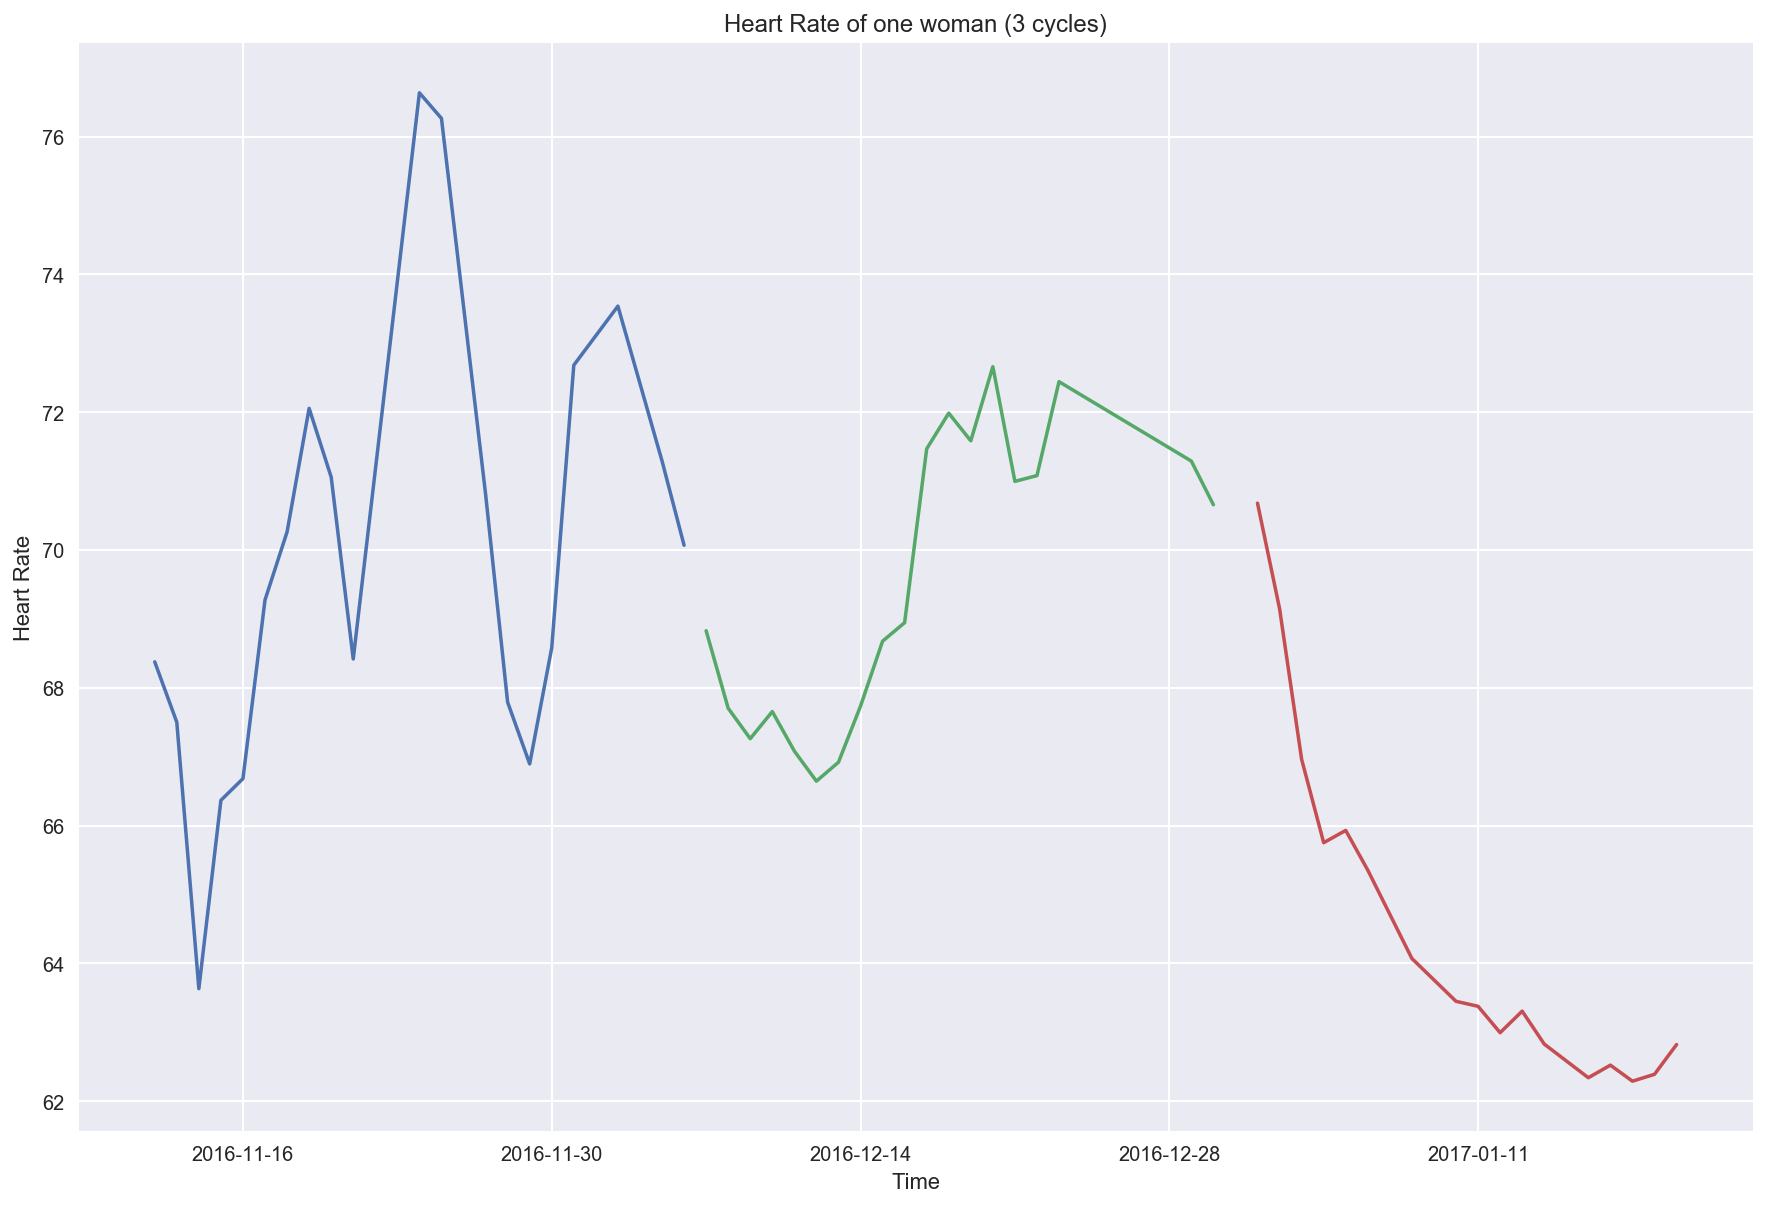

In [114]:
fig, ax = plt.subplots(figsize=(15,10))
for c in user359["cycle_number"].unique():
    ax.plot(user359[user359.cycle_number == c]["date"], user359[user359.cycle_number == c]["hr"],linestyle='-', marker = "")
#user359[["date", "hr"]].plot()
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.title('Heart Rate of one woman (3 cycles)') 


Text(0.5,1,'Breath Rate of one woman (3 cycles)')

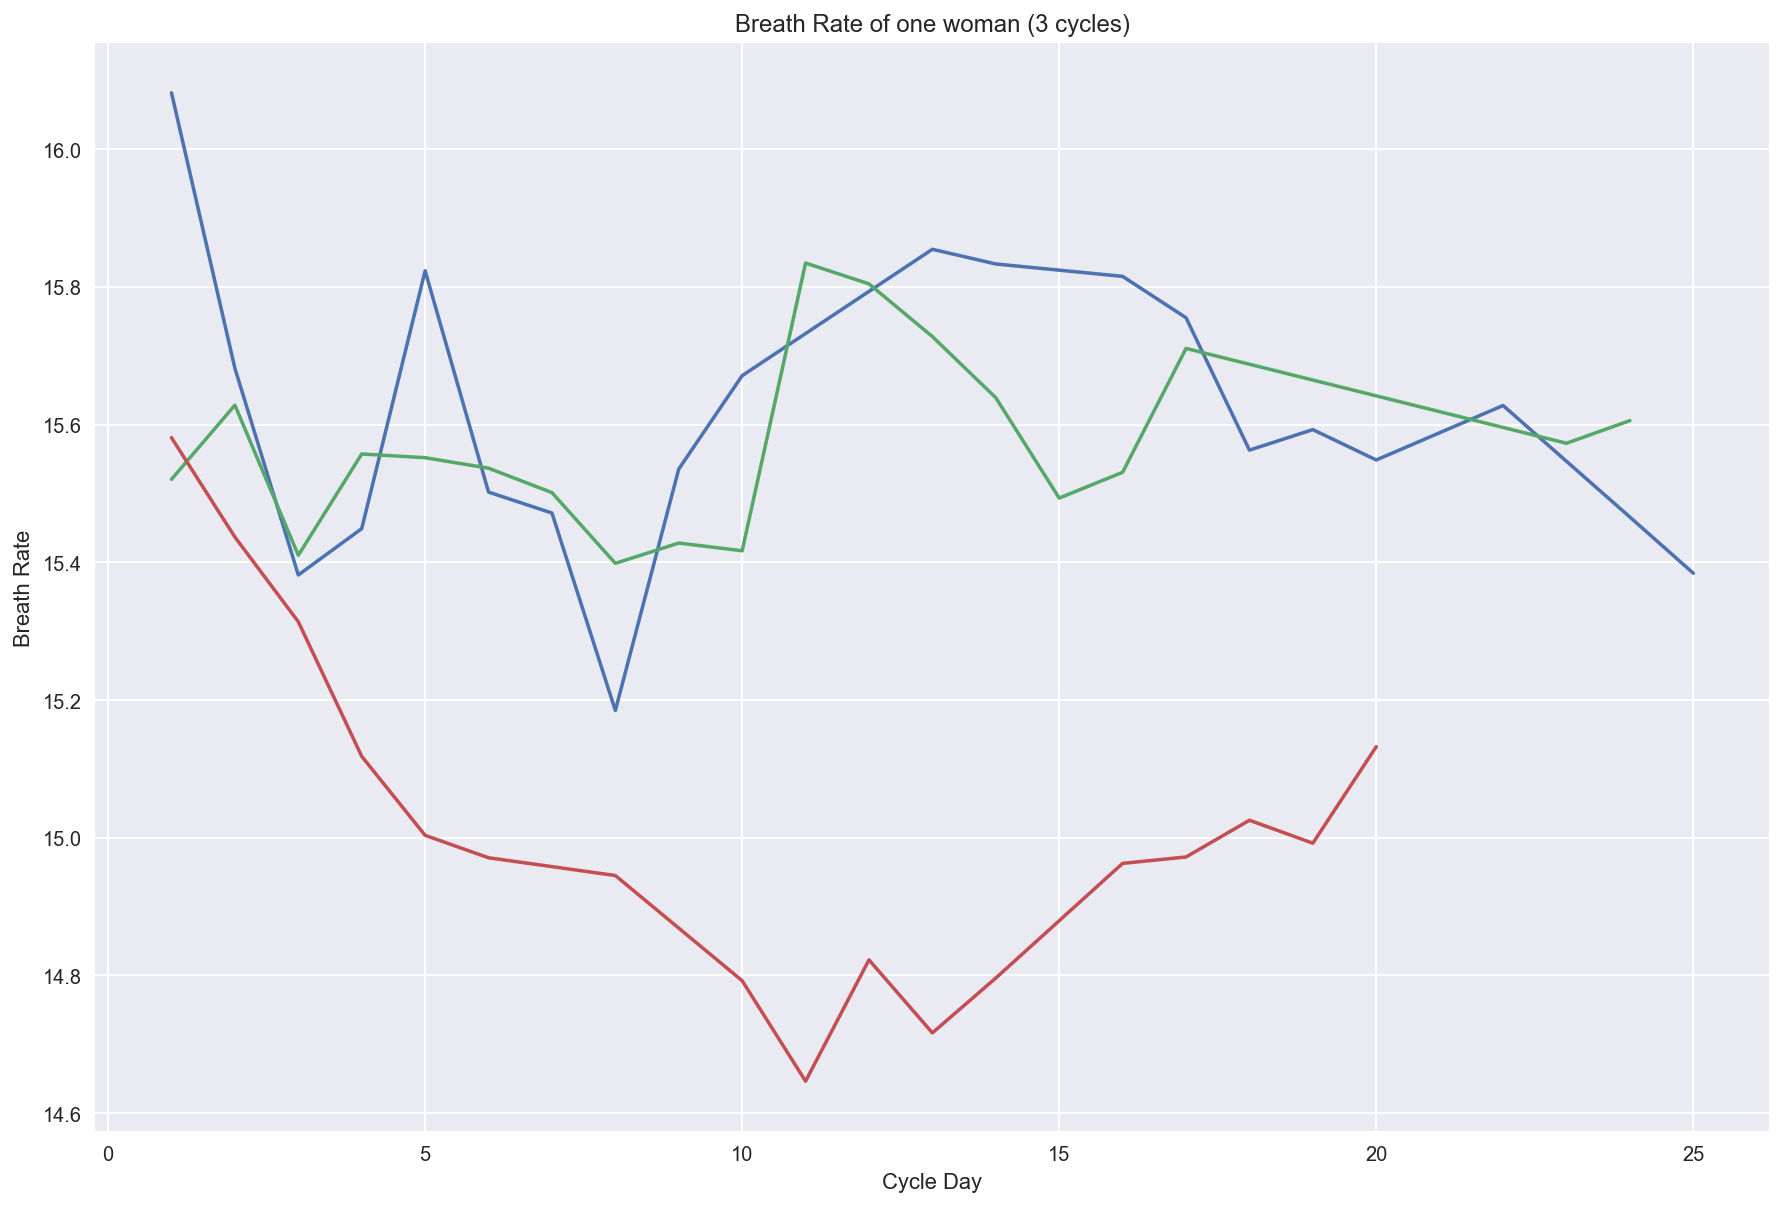

In [115]:
fig, ax = plt.subplots(figsize=(15,10))
for c in user359["cycle_number"].unique():
    ax.plot(user359[user359.cycle_number == c]["cycle_day"], user359[user359.cycle_number == c]["br"],linestyle='-', marker = "")

#user359[["date", "br"]].plot()
plt.xlabel('Cycle Day')
plt.ylabel('Breath Rate')
plt.title('Breath Rate of one woman (3 cycles)') 

Text(0.5,1,'Skin temperature of one woman (3 cycles)')

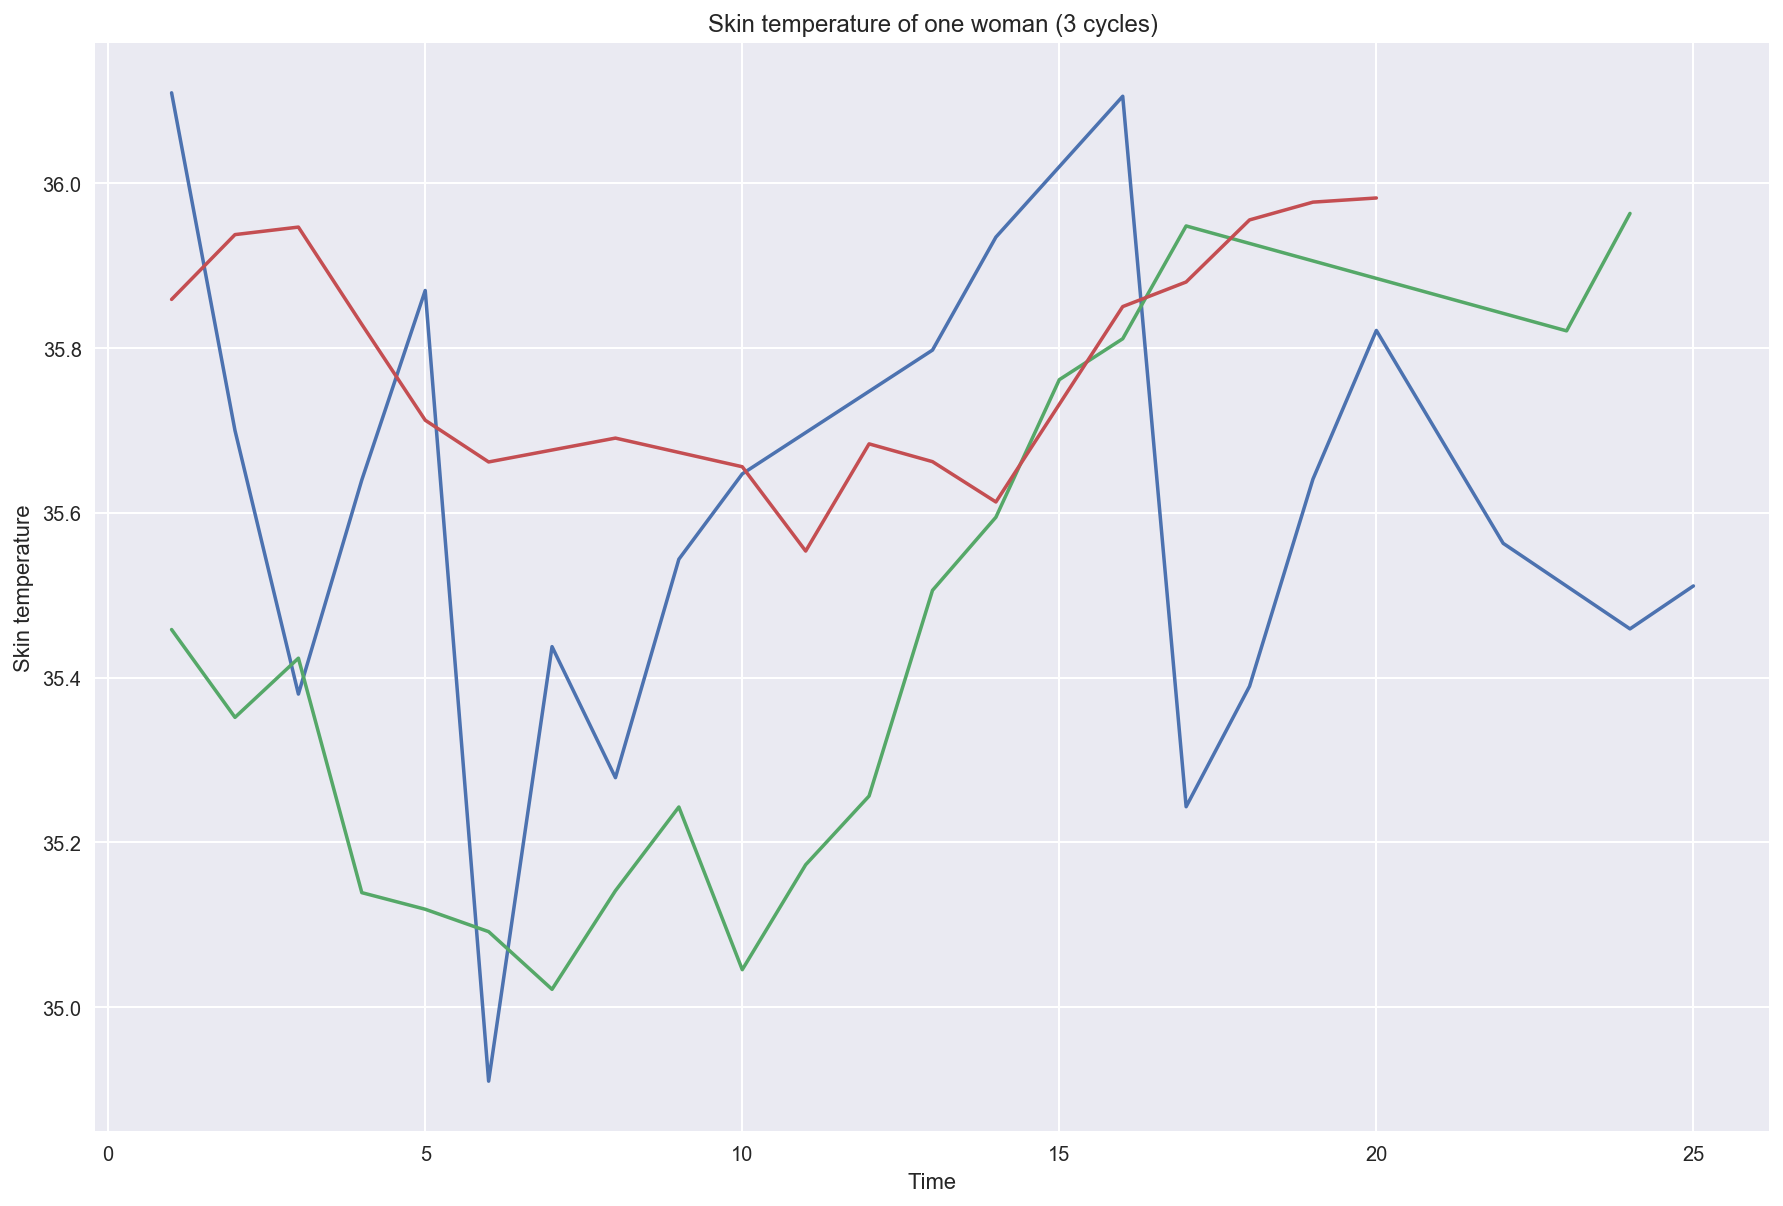

In [116]:
fig, ax = plt.subplots(figsize=(15,10))
for c in user359["cycle_number"].unique():
    ax.plot(user359[user359.cycle_number == c]["cycle_day"], user359[user359.cycle_number == c]["skin_temperature"],linestyle='-', marker = "")

#user359[["date", "skin_temperature"]].plot()
plt.xlabel('Time')
plt.ylabel('Skin temperature')
plt.title('Skin temperature of one woman (3 cycles)') 

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


NameError: name 'i' is not defined

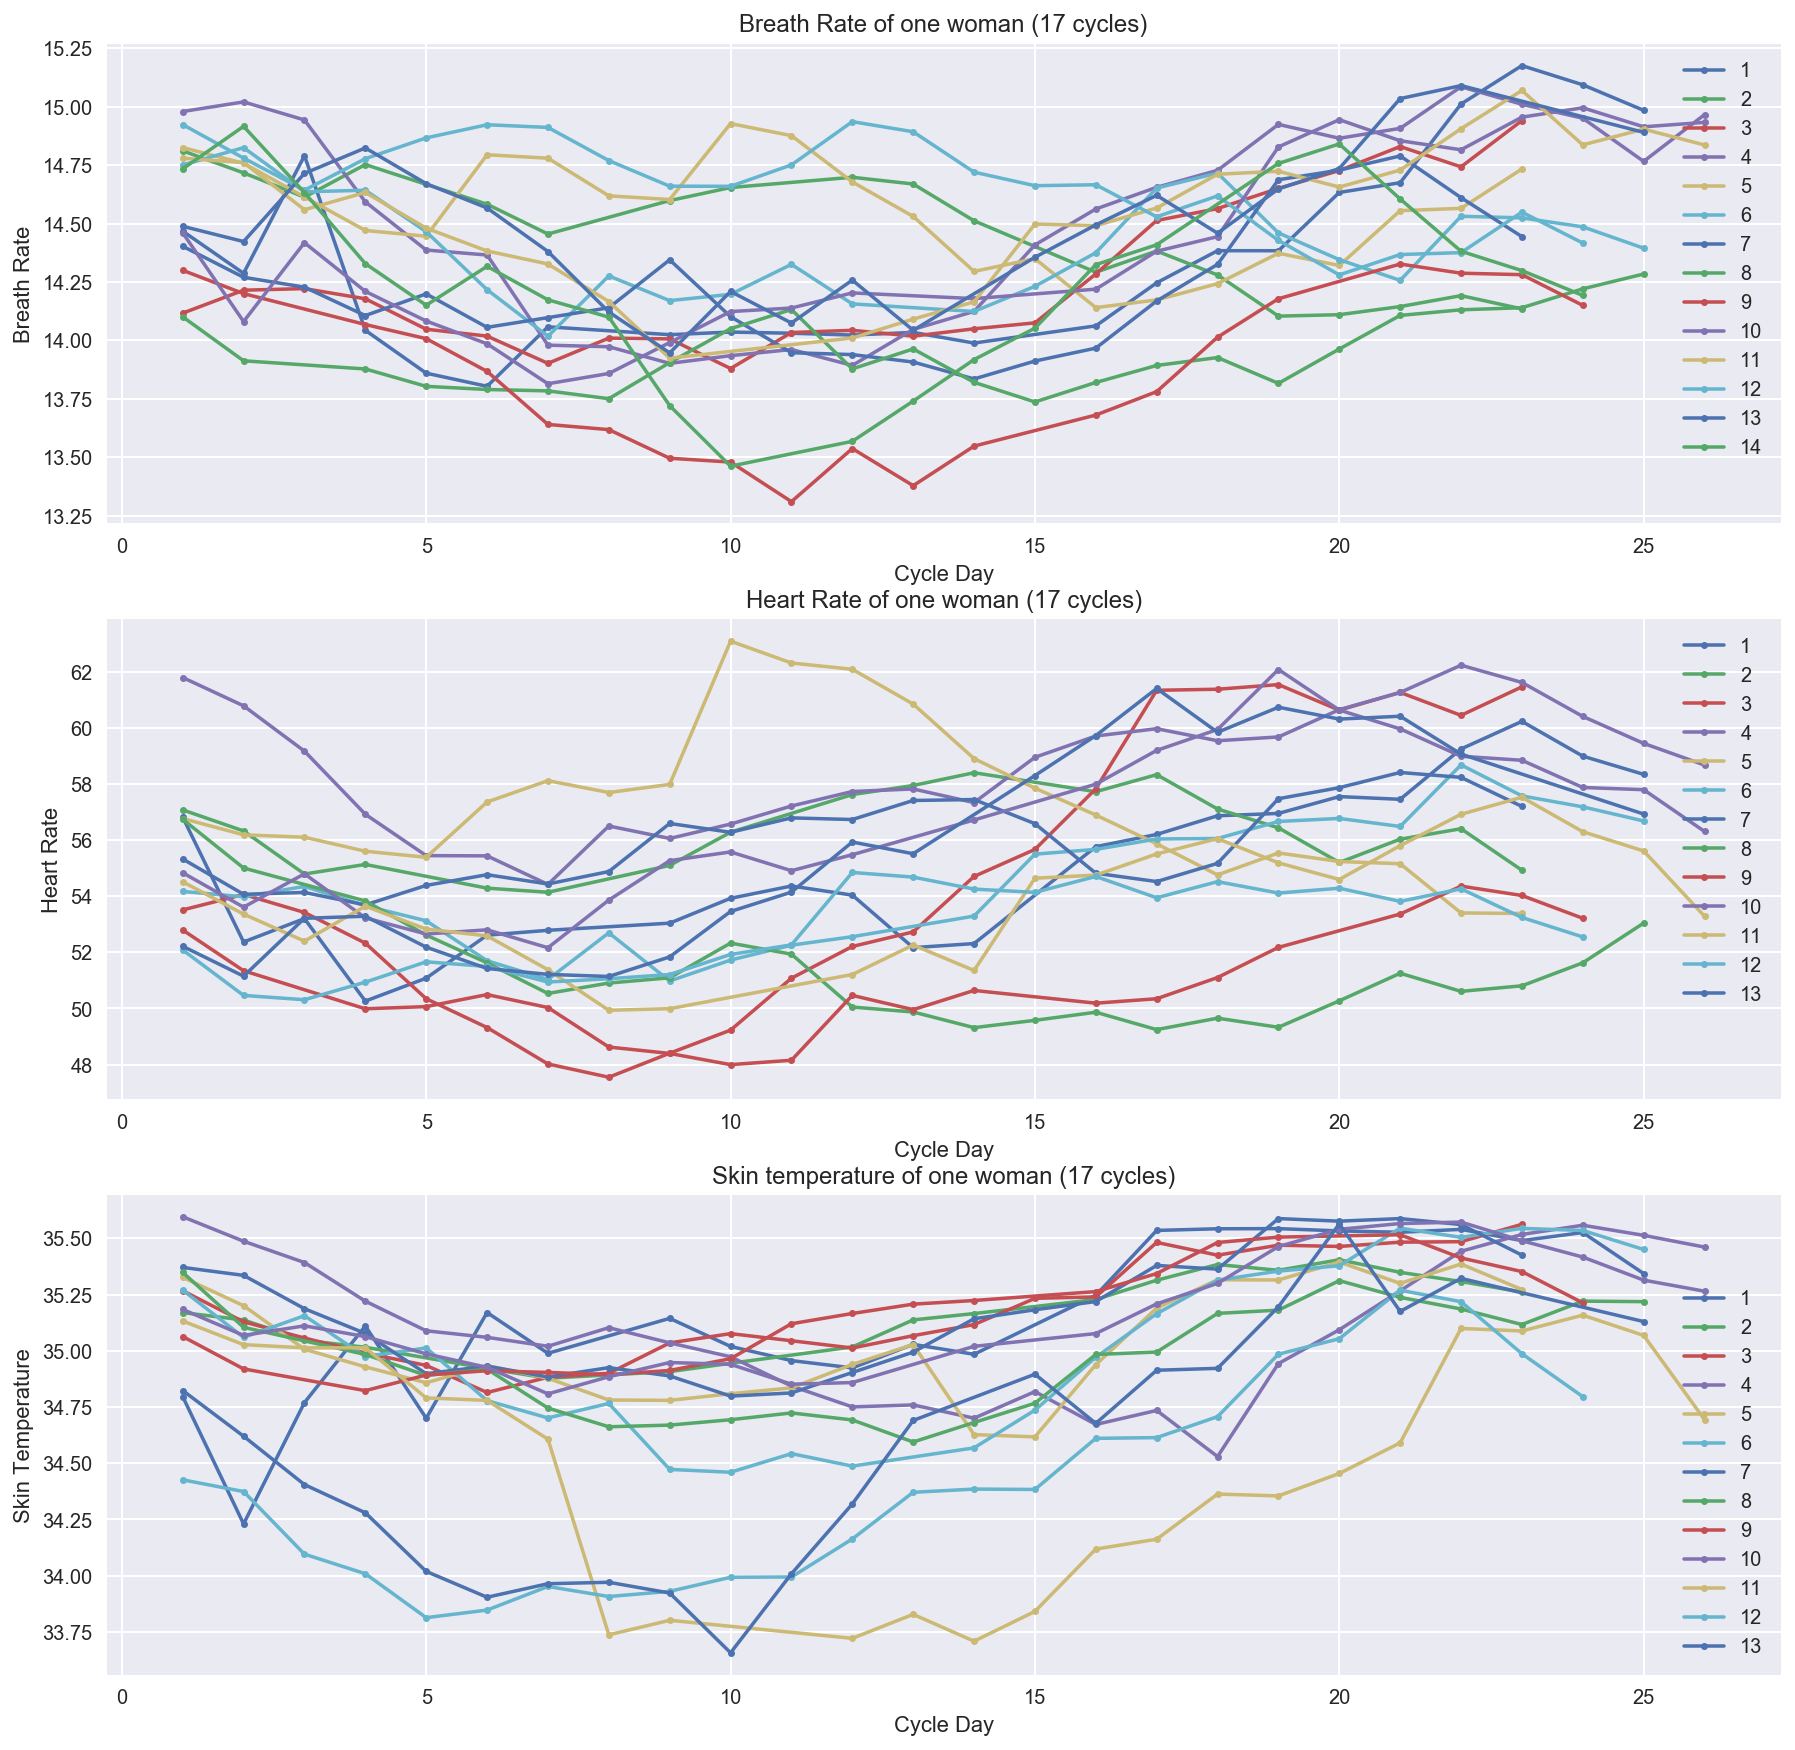

In [117]:
user407 = df[df["user"] == 407]

user = user407

fig = plt.figure(figsize=(15,15))

for c in user["cycle_number"].unique():
        ax = fig.add_subplot(3,1,1)
        ax.plot(user[user.cycle_number == c]["cycle_day"], user[user.cycle_number == c]["br"],linestyle='-', marker = ".", label = c)
        plt.xlabel('Cycle Day')
        plt.ylabel('Breath Rate')
        plt.title('Breath Rate of one woman ({} cycles)'.format(user["cycle_number"].max()))
        plt.legend()
        if user[user.cycle_number == c]["cycle_day"].max() != user[user.cycle_number == c]["cycle_length"].max():
            print("{} data missing at the end of the cycle {}.".format(user.br.name,i))
        
        ax = fig.add_subplot(3,1,2)
        ax.plot(user[user.cycle_number == c]["cycle_day"], user[user.cycle_number == c]["hr"],linestyle='-', marker = ".", label = c)
        plt.xlabel('Cycle Day')
        plt.ylabel('Heart Rate')
        plt.title('Heart Rate of one woman ({} cycles)'.format(user["cycle_number"].max()))
        plt.legend()
        if user[user.cycle_number == c]["cycle_day"].max() != user[user.cycle_number == c]["cycle_length"].max():
            print("{} data missing at the end of the cycle {}.".format(user.hr.name,i))
    
        ax = fig.add_subplot(3,1,3)
        ax.plot(user[user.cycle_number == c]["cycle_day"], user[user.cycle_number == c]["skin_temperature"],linestyle='-', marker = ".", label = c)
        plt.xlabel('Cycle Day')
        plt.ylabel('Skin Temperature')
        plt.title('Skin temperature of one woman ({} cycles)'.format(user["cycle_number"].max())) 
        plt.legend()
        if user[user.cycle_number == c]["cycle_day"].max() != user[user.cycle_number == c]["cycle_length"].max():
            print("{} data missing at the end of the cycle {}.".format(user.skin_temperature.name,i))
        
        
plt.tight_layout()

In [ ]:
user406 = df[df["user"] == 406]

user = user406

fig = plt.figure(figsize=(15,15))

for c in user["cycle_number"].unique():
        ax = fig.add_subplot(3,1,1)
        ax.plot(user[user.cycle_number == c]["cycle_day"], user[user.cycle_number == c]["br"],linestyle='-', marker = ".", label = c)
        plt.xlabel('Cycle Day')
        plt.ylabel('Breath Rate')
        plt.title('Breath Rate of one woman ({} cycles)'.format(user["cycle_number"].max()))
        plt.legend()
        if user[user.cycle_number == c]["cycle_day"].max() != user[user.cycle_number == c]["cycle_length"].max():
            print("{} data missing at the end of the cycle {}.".format(user.br.name,i))
        
        ax = fig.add_subplot(3,1,2)
        ax.plot(user[user.cycle_number == c]["cycle_day"], user[user.cycle_number == c]["hr"],linestyle='-', marker = ".", label = c)
        plt.xlabel('Cycle Day')
        plt.ylabel('Heart Rate')
        plt.title('Heart Rate of one woman ({} cycles)'.format(user["cycle_number"].max()))
        plt.legend()
        if user[user.cycle_number == c]["cycle_day"].max() != user[user.cycle_number == c]["cycle_length"].max():
            print("{} data missing at the end of the cycle {}.".format(user.hr.name,i))
    
        ax = fig.add_subplot(3,1,3)
        ax.plot(user[user.cycle_number == c]["cycle_day"], user[user.cycle_number == c]["skin_temperature"],linestyle='-', marker = ".", label = c)
        plt.xlabel('Cycle Day')
        plt.ylabel('Skin Temperature')
        plt.title('Skin temperature of one woman ({} cycles)'.format(user["cycle_number"].max())) 
        plt.legend()
        if user[user.cycle_number == c]["cycle_day"].max() != user[user.cycle_number == c]["cycle_length"].max():
            print("{} data missing at the end of the cycle {}.".format(user.skin_temperature.name,i))
        
        
plt.tight_layout()

In [ ]:
user[user.cycle_number == 1]["cycle_day"]

In [ ]:
user[user.cycle_number == 3]["cycle_day"]

In [ ]:
#### missing values

In [ ]:
fig = plt.figure(figsize=(15,15))

index = pd.DatetimeIndex(user["date"])
data = pd.Series(user["br"].values, index=index)
data = data.iloc[10:30]




for c in range(1): #user["cycle_number"].unique():
    fig, ax = plt.subplots(2, sharex=True, figsize= (18,10))

    data.asfreq('D').plot(ax=ax[0], marker='o')

    data.asfreq('D', method='bfill').plot(ax=ax[1], style='--*')
    data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')

    ax[1].legend(["back-fill", "forward-fill"]);
        
        
plt.tight_layout()

### average values as a function of the week

In [ ]:
index = pd.DatetimeIndex(user406["date"])
user = user406[["hr","br","skin_temperature"]]
data = pd.DataFrame(user406[["hr","br","skin_temperature"]].values,columns=["hr","br","skin_temperature"], index=index)

by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':*', '--*', '-*'],figsize = (15,10));

In [ ]:
plt.figure
df["skin_temperature"].plot(kind = "hist")

In [ ]:
plt.figure
df["hr"].plot(kind = "hist")

In [ ]:
plt.figure
df["br"].plot(kind = "hist")

In [ ]:
with plt.style.context(('ggplot')):
    fig = plt.figure(figsize= (15,10))
    df.groupby(["cycle_number", "user"]).count()["first_date"].plot(kind = "hist", bins=80)

#plt.yscale('log') 

In [ ]:
hist2d(df.groupby(["cycle_number", "user"]).count()["first_date"])

In [ ]:
corr = df.drop(["user", "cycle_number", "cycle_day", "Unnamed: 0"], axis=1).corr()
corr

In [ ]:

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
plt.scatter(df.skin_temperature, df.hr)

In [ ]:
plt.scatter(df.skin_temperature, df.br)

In [ ]:
plt.scatter(df.skin_temperature, df.cycle_length)

In [ ]:
plt.figure(figsize = (15,10))
plt.scatter(df.skin_temperature, df.cycle_day)

## Normalisation (z-score)

In [161]:
df = df.dropna(axis=0, how='all')

In [152]:
df["st_norm"] = (df["skin_temperature"]-df["skin_temperature"].mean())\
    /df["skin_temperature"].std()

In [162]:
df.head()

,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br,st_norm,hr_norm,br_norm
0,359,2016-11-12,2016-12-06,1,25,2016-11-12,1,36.11,68.375941,16.081958,1.163056,2.083672,0.243244
1,359,2016-11-12,2016-12-06,1,25,2016-11-13,2,35.70,67.499289,15.681856,0.551825,1.940543,0.032201
2,359,2016-11-12,2016-12-06,1,25,2016-11-14,3,35.38,63.632920,15.381588,0.074767,1.309289,-0.126182
3,359,2016-11-12,2016-12-06,1,25,2016-11-15,4,35.64,66.366427,15.448914,0.462377,1.755583,-0.090670
4,359,2016-11-12,2016-12-06,1,25,2016-11-16,5,35.87,66.680990,15.823407,0.805262,1.806941,0.106865


In [154]:
df["hr_norm"] = (df["hr"]-df["hr"].mean())\
                    /df["hr"].std()

In [155]:
df["br_norm"] = (df["br"]-df["br"].mean())\
                    /df["br"].std()

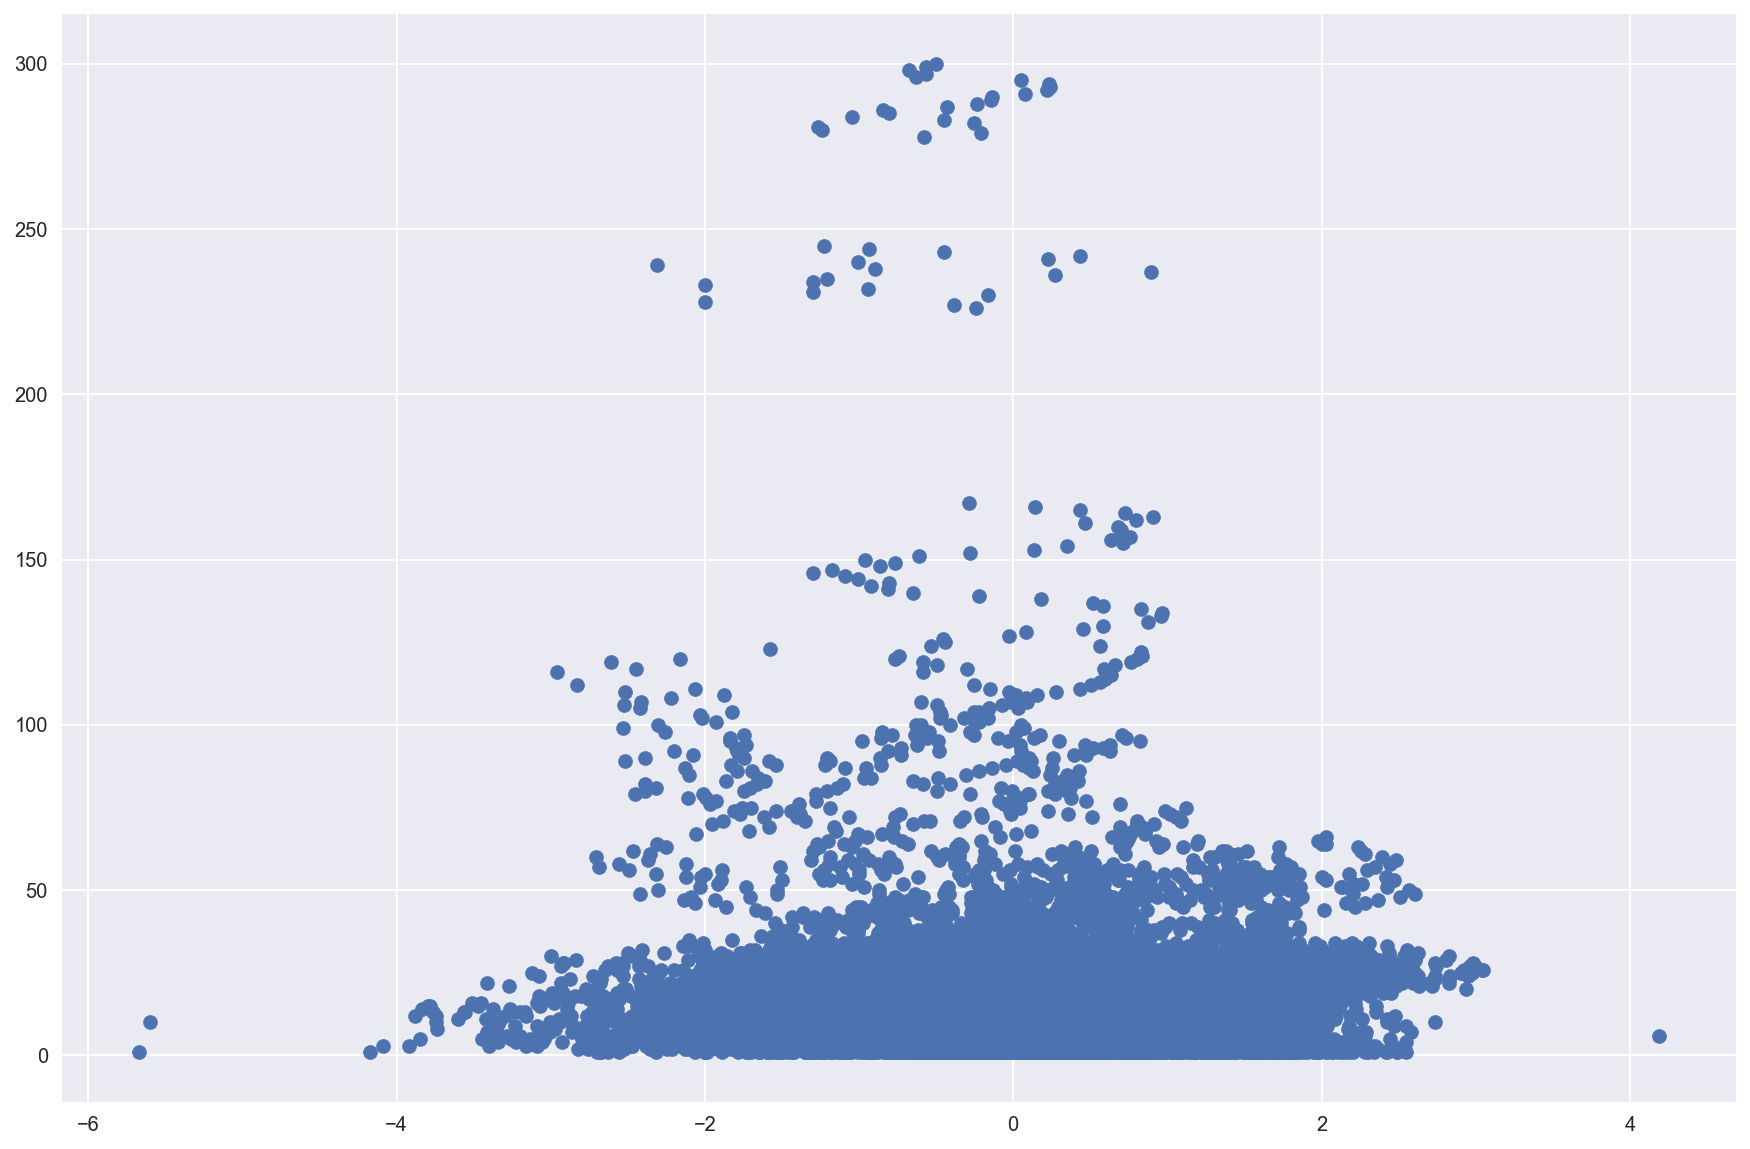

In [163]:
plt.figure(figsize = (15,10))
plt.scatter(df.st_norm, df.cycle_day)

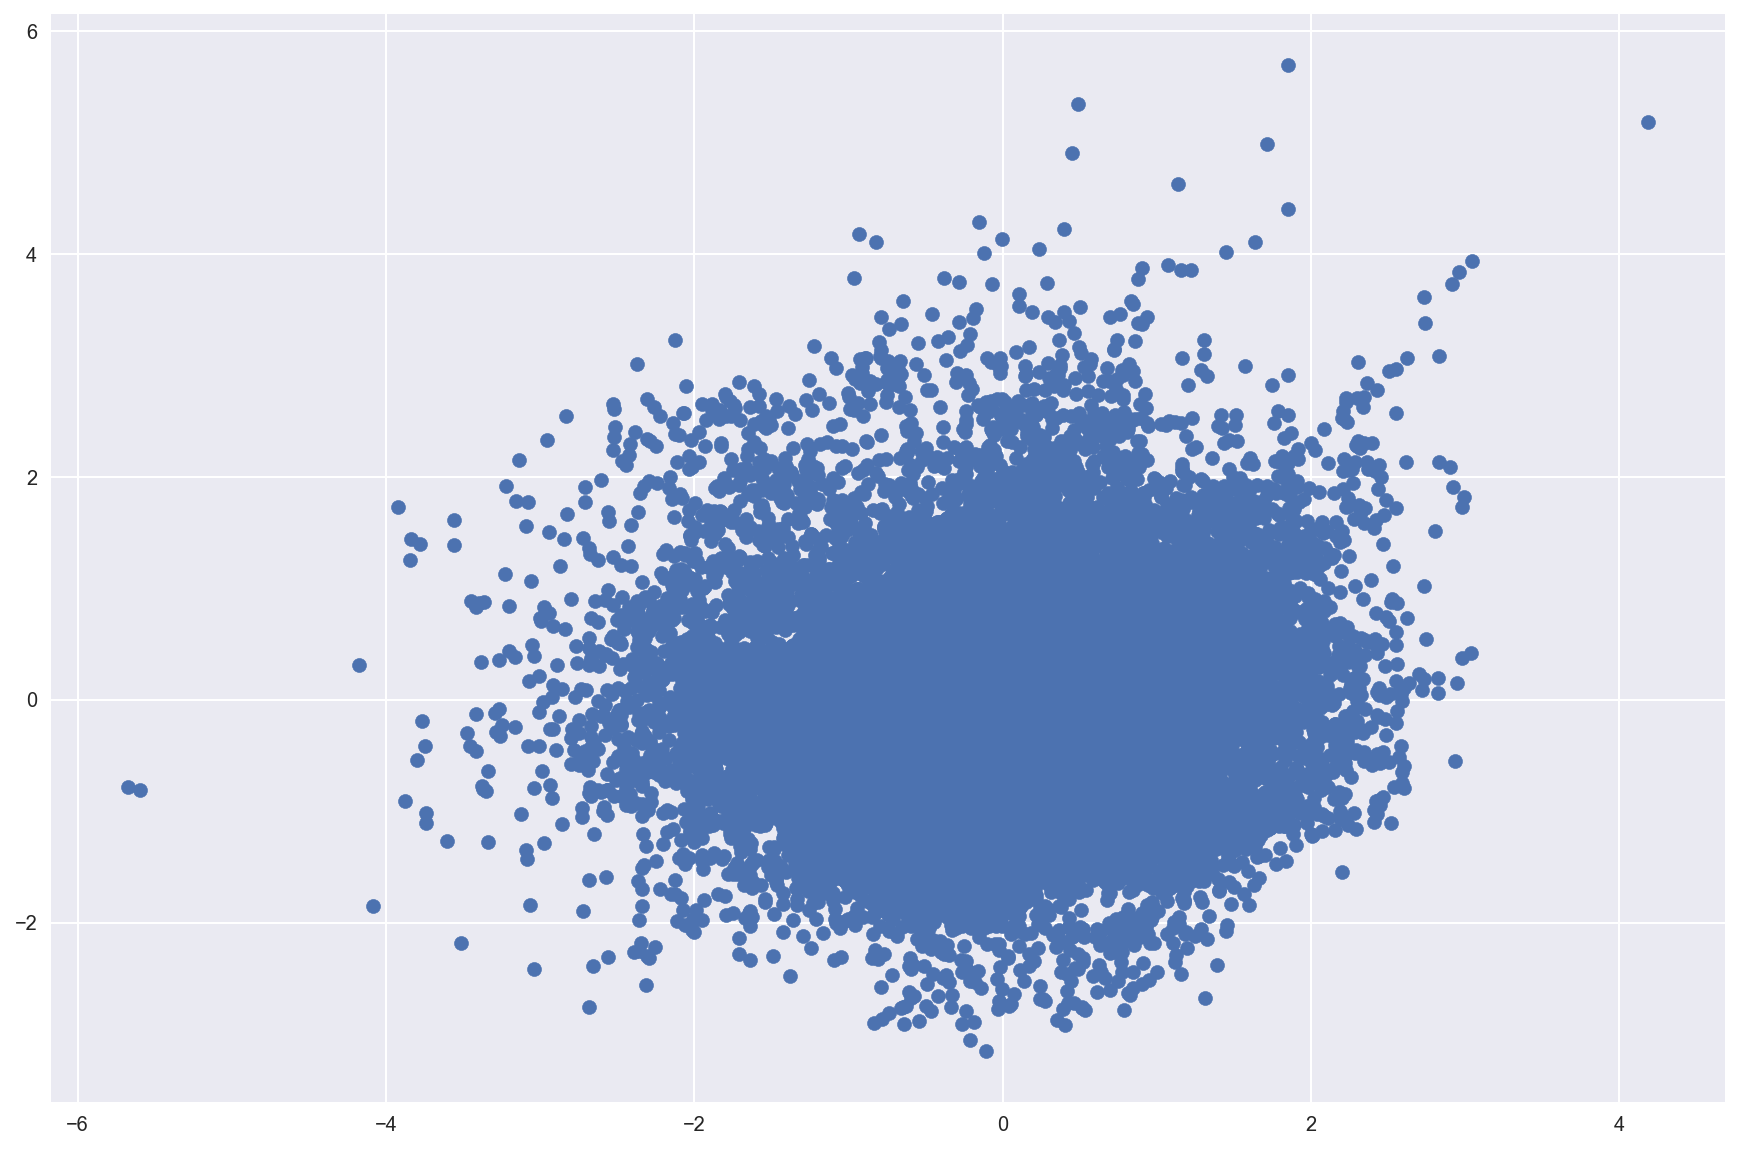

In [164]:
plt.figure(figsize = (15,10))
plt.scatter(df.st_norm, df.hr_norm)

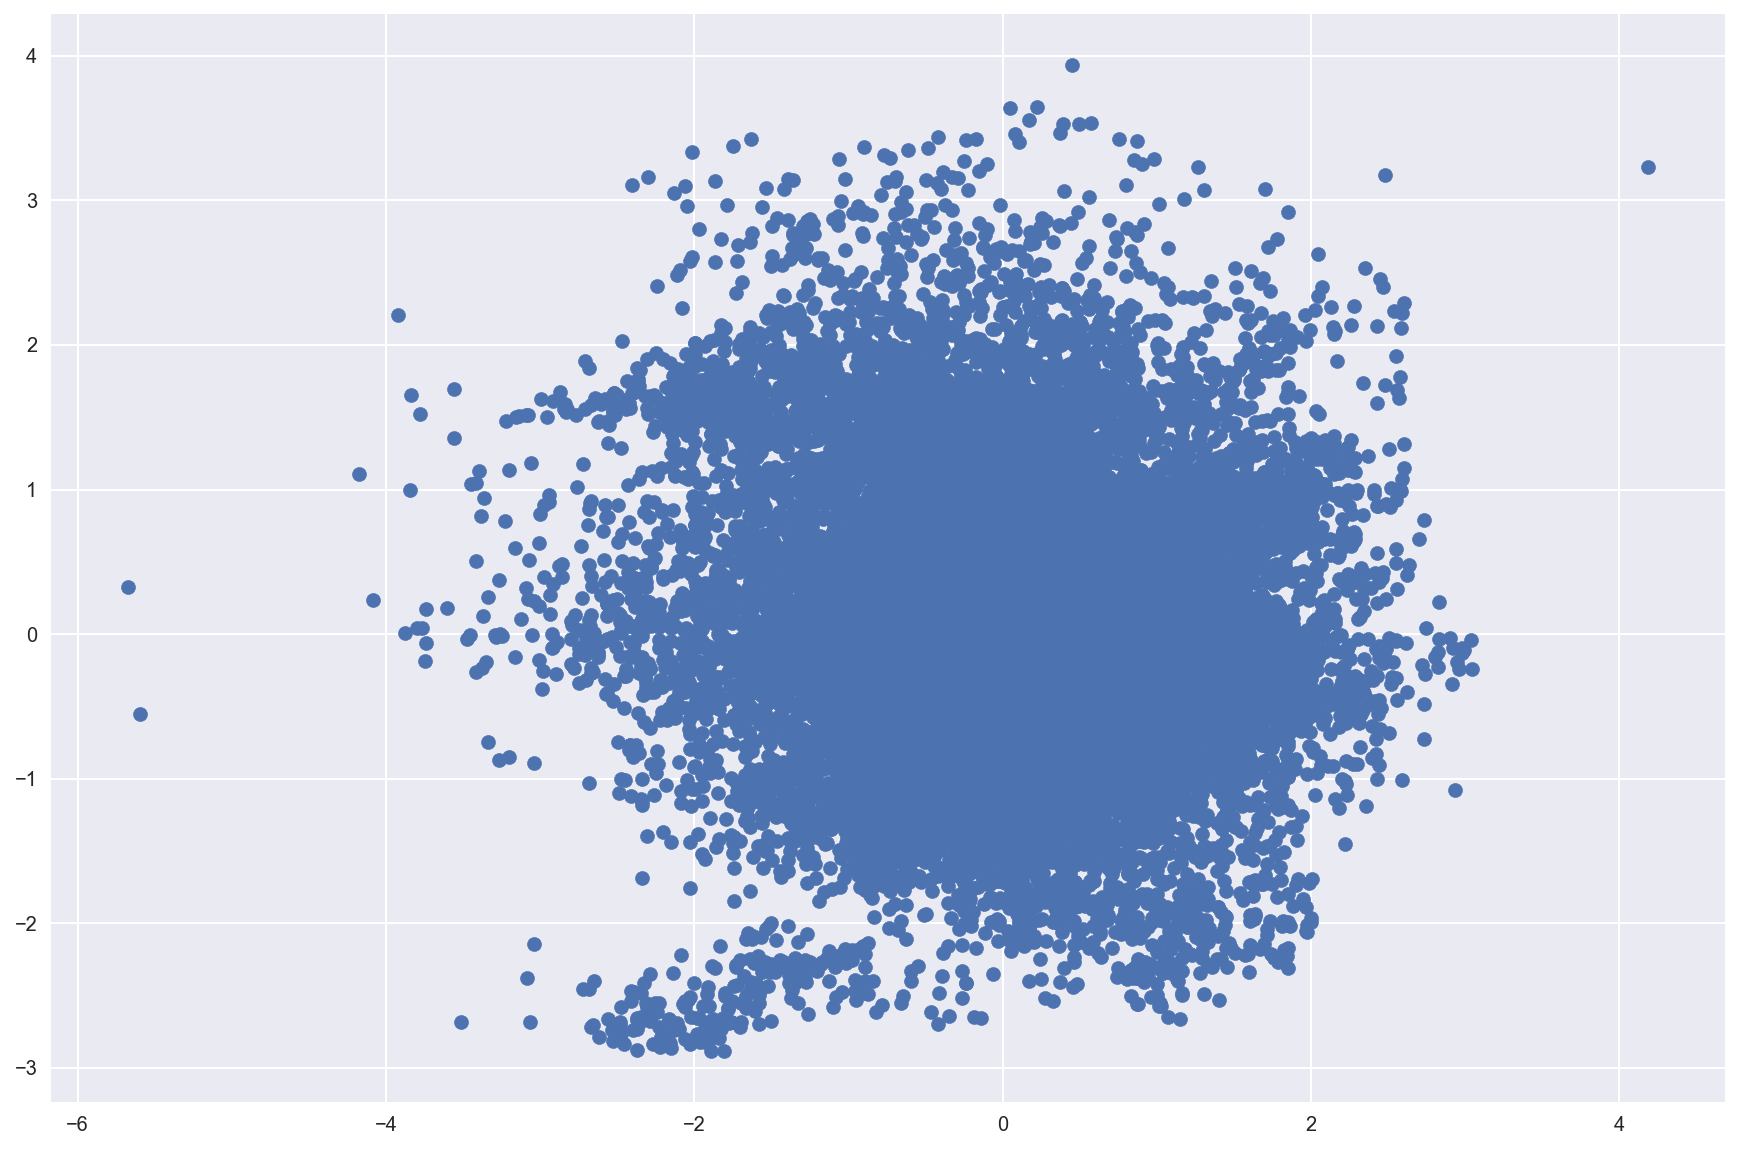

In [165]:
plt.figure(figsize = (15,10))
plt.scatter(df.st_norm, df.br_norm)

In [166]:
# Create heatmap
heatmap, xedges, yedges = np.histogram2d(df.hr_norm, df.st_norm, bins=(64,64))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
 
# Plot heatmap
plt.clf()
plt.title('Pythonspot.com heatmap example')
plt.ylabel('hr_norm')
plt.xlabel('sk_norm')
plt.imshow(heatmap, extent=extent)
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:966: RuntimeWarning: invalid value encountered in less_equal
  if np.any(np.asarray(dedges[i]) <= 0):


ValueError: cannot convert float NaN to integer

In [167]:
df[df.hr_norm.isnull()]

,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br,st_norm,hr_norm,br_norm
343,402,2016-09-15,2016-10-12,1,28,2016-09-18,4,NaN,NaN,NaN,NaN,NaN,NaN
344,402,2016-09-15,2016-10-12,1,28,2016-09-18,4,NaN,NaN,NaN,NaN,NaN,NaN
1162,407,2017-08-26,2017-09-18,15,24,2017-09-09,15,NaN,NaN,13.514969,NaN,NaN,-1.110772
3875,473,2017-01-10,2017-02-17,5,39,2017-02-12,34,NaN,NaN,17.048717,NaN,NaN,0.753182
5274,513,2017-01-27,2017-02-24,5,29,2017-02-20,25,NaN,NaN,15.785772,NaN,NaN,0.087013
6036,827,2017-06-17,2017-07-16,9,30,2017-06-20,4,NaN,NaN,15.834608,NaN,NaN,0.112773
7841,2549,2016-12-30,2017-01-26,1,28,2017-01-10,12,NaN,NaN,NaN,NaN,NaN,NaN
7842,2549,2016-12-30,2017-01-26,1,28,2017-01-11,13,NaN,NaN,NaN,NaN,NaN,NaN
7844,2549,2016-12-30,2017-01-26,1,28,2017-01-21,23,NaN,NaN,NaN,NaN,NaN,NaN
7850,2554,2017-01-17,2017-03-15,1,58,2017-01-22,6,NaN,NaN,NaN,NaN,NaN,NaN
